<a href="https://colab.research.google.com/github/Erika000o/Multiclase-con-CIFAR-10-/blob/main/Multiclase_con_CIFAR_10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [6]:
#2. Cargar y preprocesar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar las imágenes a valores entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [7]:
#3. Definir la arquitectura de la red neuronal convolucional (CNN)
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Capa de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Capa de aplanamiento
model.add(layers.Flatten())

# Capa densa completamente conectada con 64 neuronas
model.add(layers.Dense(64, activation='relu'))

# Capa de salida con 10 neuronas (una para cada clase de CIFAR-10)
model.add(layers.Dense(10))



In [8]:
#4. Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [5]:
#5.Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))



Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3815 - accuracy: 0.5059 - val_loss: 1.0745 - val_accuracy: 0.6192
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9945 - accuracy: 0.6528 - val_loss: 0.9674 - val_accuracy: 0.6597
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8593 - accuracy: 0.6999 - val_loss: 0.9443 - val_accuracy: 0.6762
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7631 - accuracy: 0.7358 - val_loss: 0.9232 - val_accuracy: 0.6833
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6746 - accuracy: 0.7666 - val_loss: 0.9543 - val_accuracy: 0.6855
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5898 - accuracy: 0.7941 - val_loss: 0.9819 - val_accuracy: 0.6812
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5148 - accuracy: 0.8210 - val_loss: 1.0536 -

In [9]:
#6. Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f'Precisión en el conjunto de prueba: {test_acc}')


313/313 - 2s - loss: 2.3035 - accuracy: 0.1108 - 2s/epoch - 5ms/step
Precisión en el conjunto de prueba: 0.11079999804496765


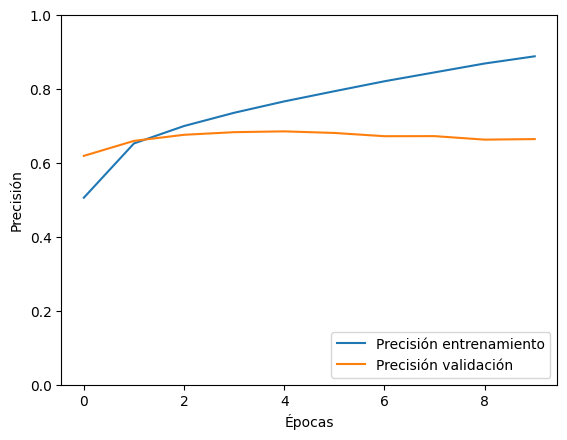

In [10]:
# 7. Graficar el historial de precisión y pérdida
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
